<a href="https://colab.research.google.com/github/evgeny-kolonsky/Lab4/blob/main/ESR/V_res/ESR%20Resonanse%20volatge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lab4 ESR Resonance voltage

Evgeny Kolonsky

v.0.1.4.1

In [74]:
!pip install uncertainties

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from uncertainties import ufloat
from uncertainties.umath import *

In [87]:
def extract_50Hz(filename):
  t, ch1, ch2 = np.genfromtxt(filename, skip_header=46, delimiter=',',
                     usecols=[1,2,3], unpack=True)
  ch1 *=1e3 # mV
  ch2 *=1e3 # mV
  t *=1e3   # ms

  fig, ax1 = plt.subplots()
  ax2 = ax1.twinx()
  ax1.plot(t, ch1,'.', alpha=0.1, label='Ch1')
  ax2.plot(t, ch2, '.-', alpha=0.1, color='green', label='Ch2')
  plt.grid()
  peaks, locs = find_peaks(ch2, height=100, distance=50, prominence=100)
  ax1.plot(t[peaks], ch1[peaks], 'x')
  print(ch1[peaks])
  v = ch1[peaks]
  v_plus = v[v>0]
  vplus_mean = np.mean(v_plus)
  vplus_std = np.std(v_plus)
  vplus = ufloat(vplus_mean, vplus_std)

  v_minus = v[v<0]
  vminus_mean = np.mean(v_minus)
  vminus_std = np.std(v_minus)
  vminus = ufloat(vminus_mean, vminus_std)
  ax1.axhline(vplus_mean, color='red')
  ax1.axhline(vminus_mean, color='red')
  ax1.set_ylabel('Ch1, mV')
  ax2.set_ylabel('Ch2, mV')
  plt.xlabel('time, ms')
  plt.legend()
  return vplus, vminus


def extract_1kHz(filename):
  t, ch1, ch2 = np.genfromtxt(filename, skip_header=46, delimiter=',',
                     usecols=[1,2,3], unpack=True)
  ch1 *=1e3 # mV
  ch2 *=1e3 # mV
  t *=1e3   # ms
  plt.plot(ch1, ch2, '.')
  plt.grid()
  vmean = np.mean(ch1)
  vstd = np.std(ch1)
  v = ufloat(vmean, vstd)
  plt.axvline(vmean, color='red')
  plt.xlabel('Ch1, mV')
  plt.ylabel('Ch2, mV')
  return v

# Set 2

## Set 2, 50 Hz experiment



[-458.09549093  434.66836214  426.22607946 -460.2060616  -454.92967963
  436.7788434   424.1155982  -462.31663227 -459.15079117  432.55776167]
50 Hz resonance: -459 and 431 mV


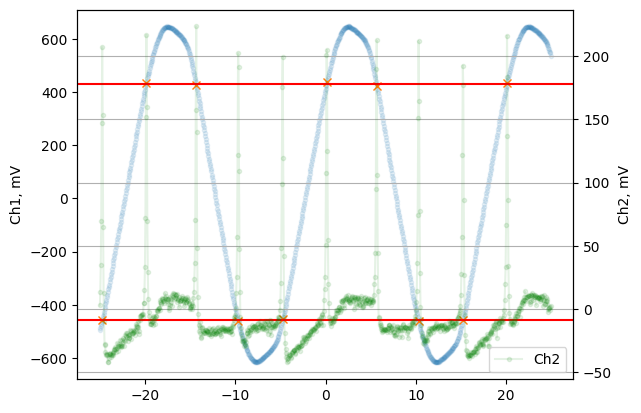

In [88]:
filename = 'https://raw.githubusercontent.com/evgeny-kolonsky/Lab4/refs/heads/main/ESR/V_res/set2_50Hz.csv'

v2p, v2m = extract_50Hz(filename)
print(f'50 Hz resonance: {v2m.n:.0f} and {v2p.n:.0f} mV')


## Set2, 1 kHz experiment

DC = 0.539 mA

Wavegen = 1Khz, amplitude 5 Vpp

Resonance voltage 450+/-5 mV


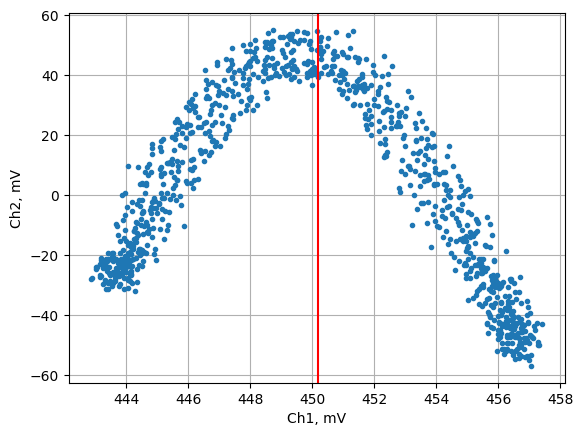

In [78]:
filename = 'https://raw.githubusercontent.com/evgeny-kolonsky/Lab4/refs/heads/main/ESR/V_res/set2_1kHz.csv'

v2 = extract_1kHz(filename)
print(f'Resonance voltage {v2} mV')

# Set 3

## Set3, 50 Hz

[-515.03896713  469.8857069   469.8857069  -515.03896713 -515.03896713
  469.8857069   469.8857069  -494.93843317 -515.03896713  489.98618126]
50 Hz resonance: -511 and 474 mV


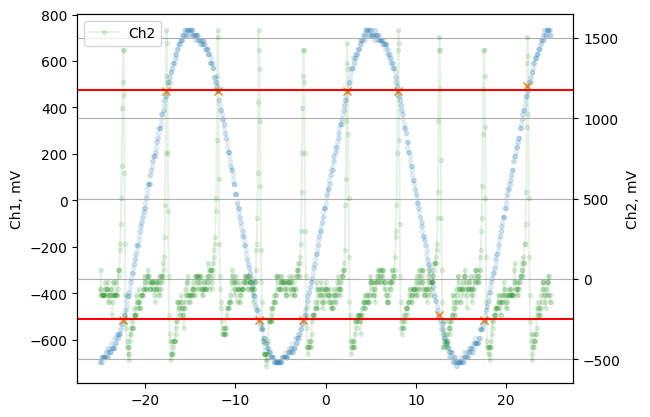

In [89]:
filename = 'https://raw.githubusercontent.com/evgeny-kolonsky/Lab4/refs/heads/main/ESR/V_res/set3_50Hz.csv'

v3p, v3m = extract_50Hz(filename)
print(f'50 Hz resonance: {v3m.n:.0f} and {v3p.n:.0f} mV')

## Set3, 1kHz experiment

DC = 590 mA

Resonance voltage 492+/-6 mV


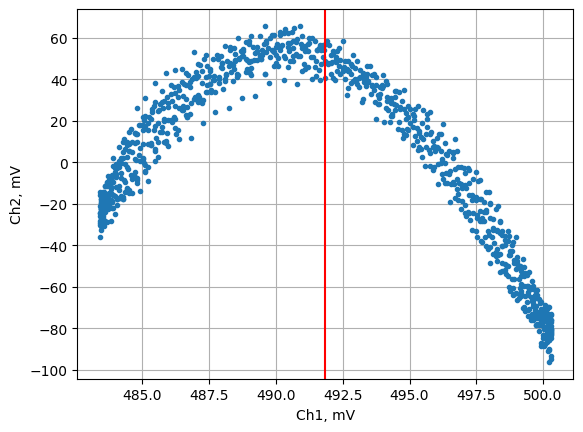

In [80]:
filename = 'https://raw.githubusercontent.com/evgeny-kolonsky/Lab4/refs/heads/main/ESR/V_res/set3_1kHz.csv'

v3 = extract_1kHz(filename)
print(f'Resonance voltage {v3} mV')

# Results


## Set 2

In [81]:
print(f'50 Hz: resonance voltage {v2m.n:.0f} and {v2p.n:.0f} mV')
print(f'1 kHz: resonance voltage {v2} mV')

50 Hz: resonance voltage -459 and 431 mV
1 kHz: resonance voltage 450+/-5 mV


## Set 3

In [82]:
print(f'50 Hz: resonance voltage {v3m.n:.0f} and {v3p.n:.0f} mV')
print(f'1 kHz: resonance voltage {v3} mV')

50 Hz: resonance voltage -511 and 456 mV
1 kHz: resonance voltage 492+/-6 mV
